# Colorspaces

Let's have a brief introduction into converting to different colorspaces! The video goes into more detail about colorspaces.

Quick Info Link: 
https://en.wikipedia.org/wiki/HSL_and_HSV


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [6]:
#img = cv2.imread('../DATA/00-puppy.jpg')
vc = cv2.VideoCapture(0)       # open the video stream from camera "0" (use "1" for additional cameras)


In [7]:
print(vc.isOpened())

True


In [8]:

while vc.isOpened():
    rval, frame = vc.read()    # read video frames again at each loop, as long as the stream is open
    cv2.imshow("stream", frame)# display each frame as an image, "stream" is the name of the window
    key = cv2.waitKey(1)       # allows user intervention without stopping the stream (pause in ms)
    if key == 27:              # exit on ESC
        break
cv2.destroyWindow("stream")    # close image window upon exit
vc.release()               

In [9]:
saved = cv2.imwrite('test_image.jpg', frame)   # save the last frame (last image before closing the stream)

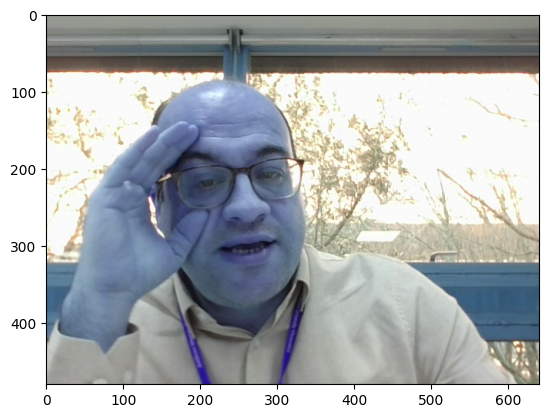

In [10]:
img = cv2.imread('test_image.jpg')   # open the saved image

plt.imshow(img)

### Converting to Different Colorspaces

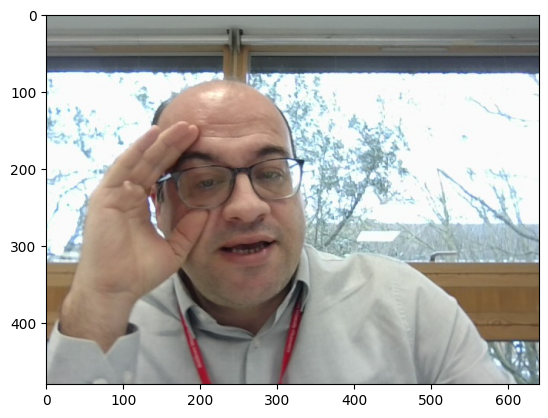

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

**Converting to HSV**
https://en.wikipedia.org/wiki/HSL_and_HSV

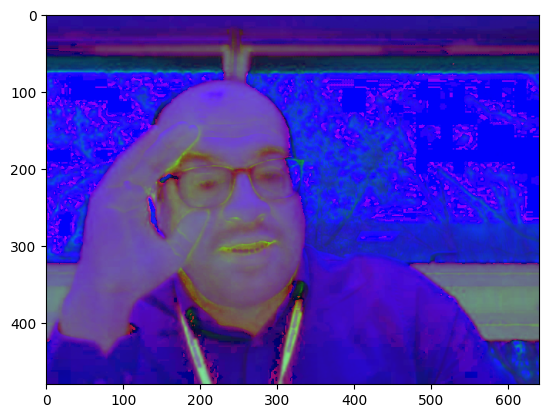

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)

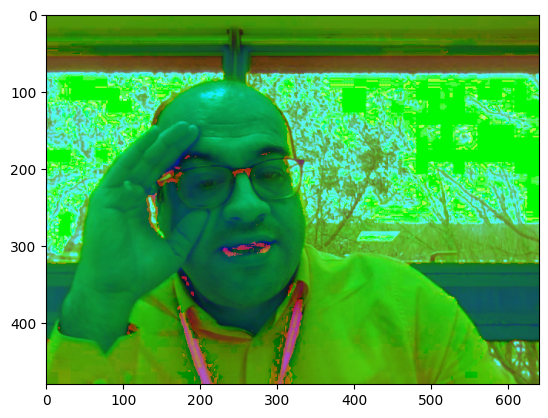

In [13]:
img = cv2.imread('test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img)

Images look strange because the original image was not coded that way.

Depending on how the original image is coded, you may need to make a conversion

COLOR+underscore+TAB and you will see all the options

### Uno cards have four colors: red, yellow, green, blue

https://www.w3schools.com/html/html_colors_hsl.asp#:~:text=Hue%20is%20a%20degree%20on,100%25%20is%20the%20full%20color  

In [29]:

HSVredmin = np.array([0, 60, 100]) # likely minimum HSV values for red (see above)
HSVredmax = np.array([20, 255, 255]) # likely maximum HSV values for red
HSVyellowmin = np.array([20, 60, 100]) # likely minimum HSV values for red (see above)
HSVyellowmax = np.array([40, 255, 255]) # likely maximum HSV values for red
HSVgreenmin = np.array([40, 60, 100]) # likely minimum HSV values for green (see above)
HSVgreenmax = np.array([80, 255, 255]) # likely maximum HSV values for green
HSVbluemin = np.array([100, 60, 100]) # likely minimum HSV values for blue (see above)
HSVbluemax = np.array([255, 255, 255]) # likely maximum HSV values for blue


#img = cv2.imread('test_image.jpg')
img = cv2.imread("UnoCardBlue7.jpg")
#img = cv2.resize(img, None, fx=0.25, fy=0.25)
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
img_red_th = cv2.inRange(img_HSV, HSVredmin, HSVredmax) # inRange selects all pixels within the desired ranges for the three channels
img_yel_th = cv2.inRange(img_HSV, HSVyellowmin, HSVyellowmax) # inRange selects all pixels within the desired ranges for the three channels
img_gre_th = cv2.inRange(img_HSV, HSVgreenmin, HSVgreenmax) # inRange selects all pixels within the desired ranges for the three channels
img_blu_th = cv2.inRange(img_HSV, HSVbluemin, HSVbluemax) # inRange selects all pixels within the desired ranges for the three channels
print(f"amount of red pixels{img_red_th.sum()}")
print(f"amount of yellow pixels{img_yel_th.sum()}")
print(f"amount of green pixels{img_gre_th.sum()}")
print(f"amount of blue pixels{img_blu_th.sum()}")
cv2.imshow('original',img)
cv2.imshow('colour threshold',img_blu_th)
cv2.waitKey(0)
cv2.destroyAllWindows()

amount of red pixels292740
amount of yellow pixels0
amount of green pixels0
amount of blue pixels1657755
